# Projet ML: Classification du cancer du sein à l'aide de SVM
#### Le but est de construire un algorithme pour identifier automatiquement si une patiente souffre ou non d'un cancer du sein en regardant les images de biopsie.
#### L'ensemble de données peut être téléchargé à partir d'ici : <href>https://web.inf.ufpr.br/vri/databases/breast-cancer-histopathological-database-breakhis/</href>
#### Le dossier d'entrainement contient 417 images dans chaque catégorie (malignant et bening) tandis que le dossier de validation contient 189 images dans chaque catégorie.
#### Réalisé par: Souad Atigi

## Importation des images

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel

In [2]:
print(os.listdir("/Users/mac/Desktop/Cancer"))
#Redimentionner les images
SIZE = 128

['.DS_Store', 'Train', 'Validation']


In [3]:
#Capturer les images et les labels dans des tableaux.
#Commencer par créer des listes vides.
train_images = []
train_labels = [] 
for directory_path in glob.glob("/Users/mac/Desktop/Cancer/train/*"):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR) #Reading color images
        img = cv2.resize(img, (SIZE, SIZE)) #Resize images
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #Optional step. Change BGR to RGB
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

malignant
/Users/mac/Desktop/Cancer/train/malignant/SOB_M_DC-14-13993-400-017.png
/Users/mac/Desktop/Cancer/train/malignant/SOB_M_DC-14-13993-400-003.png
/Users/mac/Desktop/Cancer/train/malignant/SOB_M_DC-14-17901-400-004.png
/Users/mac/Desktop/Cancer/train/malignant/SOB_M_DC-14-17901-400-010.png
/Users/mac/Desktop/Cancer/train/malignant/SOB_M_DC-14-18650-400-027.png
/Users/mac/Desktop/Cancer/train/malignant/SOB_M_DC-14-16188-400-007.png
/Users/mac/Desktop/Cancer/train/malignant/SOB_M_DC-14-20636-400-006.png
/Users/mac/Desktop/Cancer/train/malignant/SOB_M_DC-14-20636-400-012.png
/Users/mac/Desktop/Cancer/train/malignant/SOB_M_DC-14-16188-400-013.png
/Users/mac/Desktop/Cancer/train/malignant/SOB_M_DC-14-20636-400-013.png
/Users/mac/Desktop/Cancer/train/malignant/SOB_M_DC-14-16188-400-012.png
/Users/mac/Desktop/Cancer/train/malignant/SOB_M_DC-14-16188-400-006.png
/Users/mac/Desktop/Cancer/train/malignant/SOB_M_DC-14-20636-400-007.png
/Users/mac/Desktop/Cancer/train/malignant/SOB_M_DC-14-

In [4]:
#Capturer les images et les labels dans des tableaux.
#Commencer par créer des listes vides.
test_images = []
test_labels = [] 
for directory_path in glob.glob("/Users/mac/Desktop/Cancer/validation/*"):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR) #Reading color images
        img = cv2.resize(img, (SIZE, SIZE)) #Resize images
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #Optional step. Change BGR to RGB
        test_images.append(img)
        test_labels.append(label)
        
test_images = np.array(test_images)
test_labels = np.array(test_labels)

malignant
/Users/mac/Desktop/Cancer/validation/malignant/SOB_M_DC-14-4372-400-004.png
/Users/mac/Desktop/Cancer/validation/malignant/SOB_M_DC-14-4372-400-010.png
/Users/mac/Desktop/Cancer/validation/malignant/SOB_M_DC-14-5694-400-016.png
/Users/mac/Desktop/Cancer/validation/malignant/SOB_M_DC-14-5694-400-002.png
/Users/mac/Desktop/Cancer/validation/malignant/SOB_M_DC-14-2985-400-014.png
/Users/mac/Desktop/Cancer/validation/malignant/SOB_M_DC-14-2980-400-011.png
/Users/mac/Desktop/Cancer/validation/malignant/SOB_M_DC-14-2980-400-005.png
/Users/mac/Desktop/Cancer/validation/malignant/SOB_M_DC-14-2980-400-004.png
/Users/mac/Desktop/Cancer/validation/malignant/SOB_M_DC-14-2980-400-010.png
/Users/mac/Desktop/Cancer/validation/malignant/SOB_M_DC-14-2985-400-001.png
/Users/mac/Desktop/Cancer/validation/malignant/SOB_M_DC-14-5694-400-003.png
/Users/mac/Desktop/Cancer/validation/malignant/SOB_M_DC-14-5694-400-017.png
/Users/mac/Desktop/Cancer/validation/malignant/SOB_M_DC-14-4372-400-011.png
/U

## Prétraitement des données 

In [5]:
#Encoder les labels du texte (noms de dossier) en nombres entiers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [6]:
#Diviser les données en ensembles de données de test et d'entraînement (déjà fractionnés mais affectés à une convention significative)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [7]:
# Normaliser les valeurs de pixels entre 0 et 1
x_train, x_test = x_train / 255.0, x_test / 255.0

## Extraction de caractéristique  

In [8]:
def feature_extractor(dataset):
    x_train = dataset
    image_dataset = pd.DataFrame()
    for image in range(x_train.shape[0]):  #parcourir chaque fichier
        #print(image)
        
        df = pd.DataFrame()  #DataFrame temporaire pour capturer des informations pour chaque boucle.
        
        input_img = x_train[image, :,:,:]
        img = input_img
        
    #Commencer à ajouter des données au dataframe
    #Ajouter des extracteurs de caractéristiques, par ex. détection des contours, lissage, etc.
            
         #CARACTÉRISTIQUE 1 - Valeurs en pixels
         
        #Ajouter des valeurs de pixels au DataFrame
        pixel_values = img.reshape(-1)
        df['Pixel_Value'] = pixel_values  # La valeur du pixel elle-même en tant que feature
        #df['Image_Name'] = image  #Capturer le nom de l'image lorsque nous lisons plusieurs images
        
        # FEATURE 2 - Filtre de Gabor
        
                #Générer Gabor features
        num = 1  #Pour compter afin de donner aux Gabor features une étiquette dans le DataFrame
        kernels = []
        for theta in range(2):     #Définir le nombre de thetas
            theta = theta / 4. * np.pi
            for sigma in (1, 3):  
                lamda = np.pi/4
                gamma = 0.5
                gabor_label = 'Gabor' + str(num)  #Étiquetez les colonnes Gabor comme Gabor1, Gabor2, etc.
    #                print(gabor_label)
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel) 
                #Filtrer maintenant l'image et ajouter des valeurs à une nouvelle colonne
                fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Étiquettes des colonnes comme Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Incrément pour l'étiquette de la colonne Gabor
       
        
        
        #Ajouter des features de l'image actuelle à l'ensemble de données
        image_dataset = image_dataset.append(df)
        
    return image_dataset

In [9]:
#Extraire les caractéristiques des images d'entraînement
image_features = feature_extractor(x_train)

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

## Entrainement du modèle

In [10]:
#Extraire les caractéristiques des images d'entraînement
image_features = feature_extractor(x_train)

n_features = image_features.shape[1]
image_features = np.expand_dims(image_features, axis=0)
X_for_SVM = np.reshape(image_features, (x_train.shape[0], -1))  

#Définir le classifieur
from sklearn import svm
SVM_model = svm.SVC() 
SVM_model.fit(X_for_SVM, y_train)

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

SVC()

## Tester le modèle

In [11]:
test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_SVM = np.reshape(test_features, (x_test.shape[0], -1))

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

In [12]:
#Prédiction
test_prediction = SVM_model.predict(test_for_SVM)
#inverse_transform récupère l'étiquette d'origine.
test_prediction = le.inverse_transform(test_prediction)


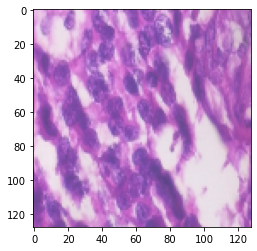

In [13]:
#Vérifier les résultats sur quelques images aléatoires
import random
n=random.randint(0, x_test.shape[0]-1) 
img = x_test[n]
plt.imshow(img)

## Évaluer la performance du modèle

              precision    recall  f1-score   support

      bening       0.90      0.76      0.83       189
   malignant       0.79      0.92      0.85       189

    accuracy                           0.84       378
   macro avg       0.85      0.84      0.84       378
weighted avg       0.85      0.84      0.84       378



<AxesSubplot:>

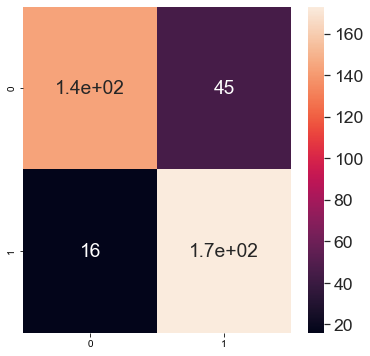

In [14]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, test_prediction))
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_prediction)

fig, ax = plt.subplots(figsize=(6,6))         
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)